In [3]:
from keras.models import load_model
from vis.utils import utils
from keras import activations
import os
import numpy as np
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
resnet_model = '/home/ys587/__Data/__whistle/__log_dir_context/classification_audio/__cv5/resnet_cifar10_expt_run3_f1_p731/fold1/epoch_90_valloss_0.1030_valacc_0.9784.hdf5'

model = load_model(resnet_model)
model.layers[-1].activation = activations.linear
model = utils.apply_modifications(model)

In [5]:
data_store_five = "/home/ys587/__Data/__whistle/__log_dir_context/audio_data_store/__five_class"
# pie 1
pie1_data_path = os.path.join(data_store_five, 'pie1_data.npz')
data_temp = np.load(pie1_data_path)
whistle_image_pie1 = data_temp['whistle_image']
label_pie1 = data_temp['label'].tolist()

whistle_image_pie1_4d = np.expand_dims(whistle_image_pie1, axis=3)

print(whistle_image_pie1_4d.shape)

(2204, 144, 250, 1)


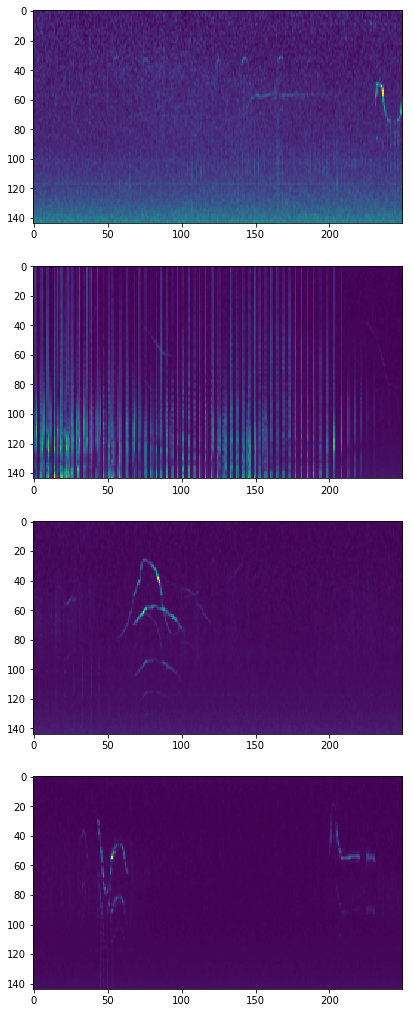

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (30, 18)

# img0 = whistle_image_pie1[0,:,:]
# f, ax = plt.subplots(1, 1)
# ax.imshow(img0)

img0 = whistle_image_pie1[21,:,:]
img1 = whistle_image_pie1[41,:,:]
img2 = whistle_image_pie1[51,:,:]
img3 = whistle_image_pie1[61,:,:]
f, ax = plt.subplots(4, 1)
ax[0].imshow(img0)
ax[1].imshow(img1)
ax[2].imshow(img2)
ax[3].imshow(img3)

(144, 250)
(1, 144, 250, 1)
(144, 250)
(1, 144, 250, 1)
(144, 250)
(1, 144, 250, 1)
(144, 250)
(1, 144, 250, 1)


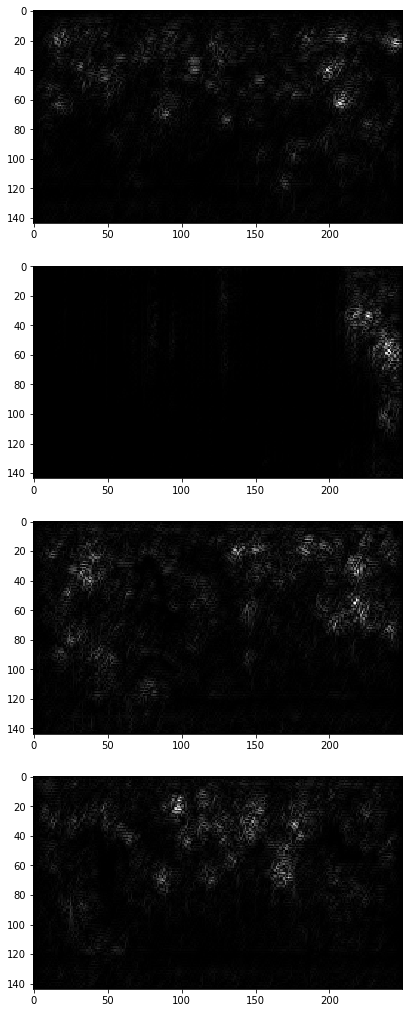

In [7]:
from vis.visualization import visualize_saliency, overlay
from vis.utils import utils
from keras import activations

plt.rcParams['figure.figsize'] = (30, 18)
f, ax = plt.subplots(4, 1)
for i, img in enumerate([img0, img1, img2, img3]):
    print(img.shape)
    img3d = np.expand_dims(img, axis=0)
    img4d = np.expand_dims(img3d, axis=3)
    print(img4d.shape)
    grads = visualize_saliency(model, -1, filter_indices=1, seed_input=img4d)
    ax[i].imshow(grads, cmap='gray')


<Figure size 2160x1296 with 0 Axes>

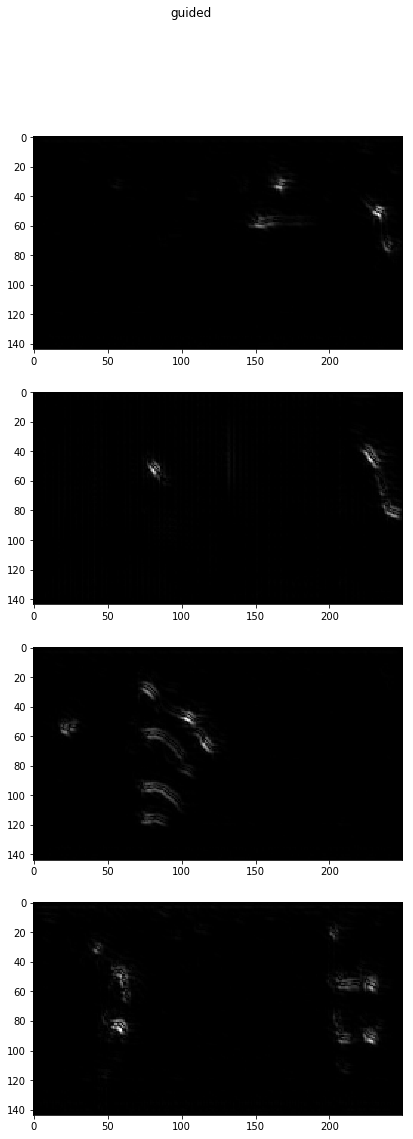

<Figure size 2160x1296 with 0 Axes>

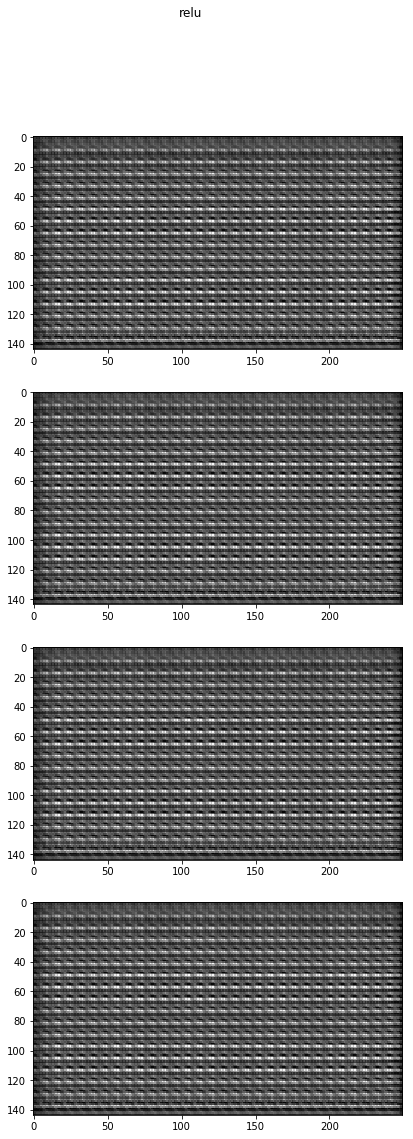

In [8]:
for modifier in ['guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(4, 1)
    plt.suptitle(modifier)
    for i, img in enumerate([img0, img1, img2, img3]):
        img3d = np.expand_dims(img, axis=0)
        img4d = np.expand_dims(img3d, axis=3)
        grads = visualize_saliency(model, -1, filter_indices=1, seed_input=img4d, backprop_modifier=modifier)
        ax[i].imshow(grads, cmap='gray')


In [9]:
# model.summary()

<Figure size 1440x1008 with 0 Axes>

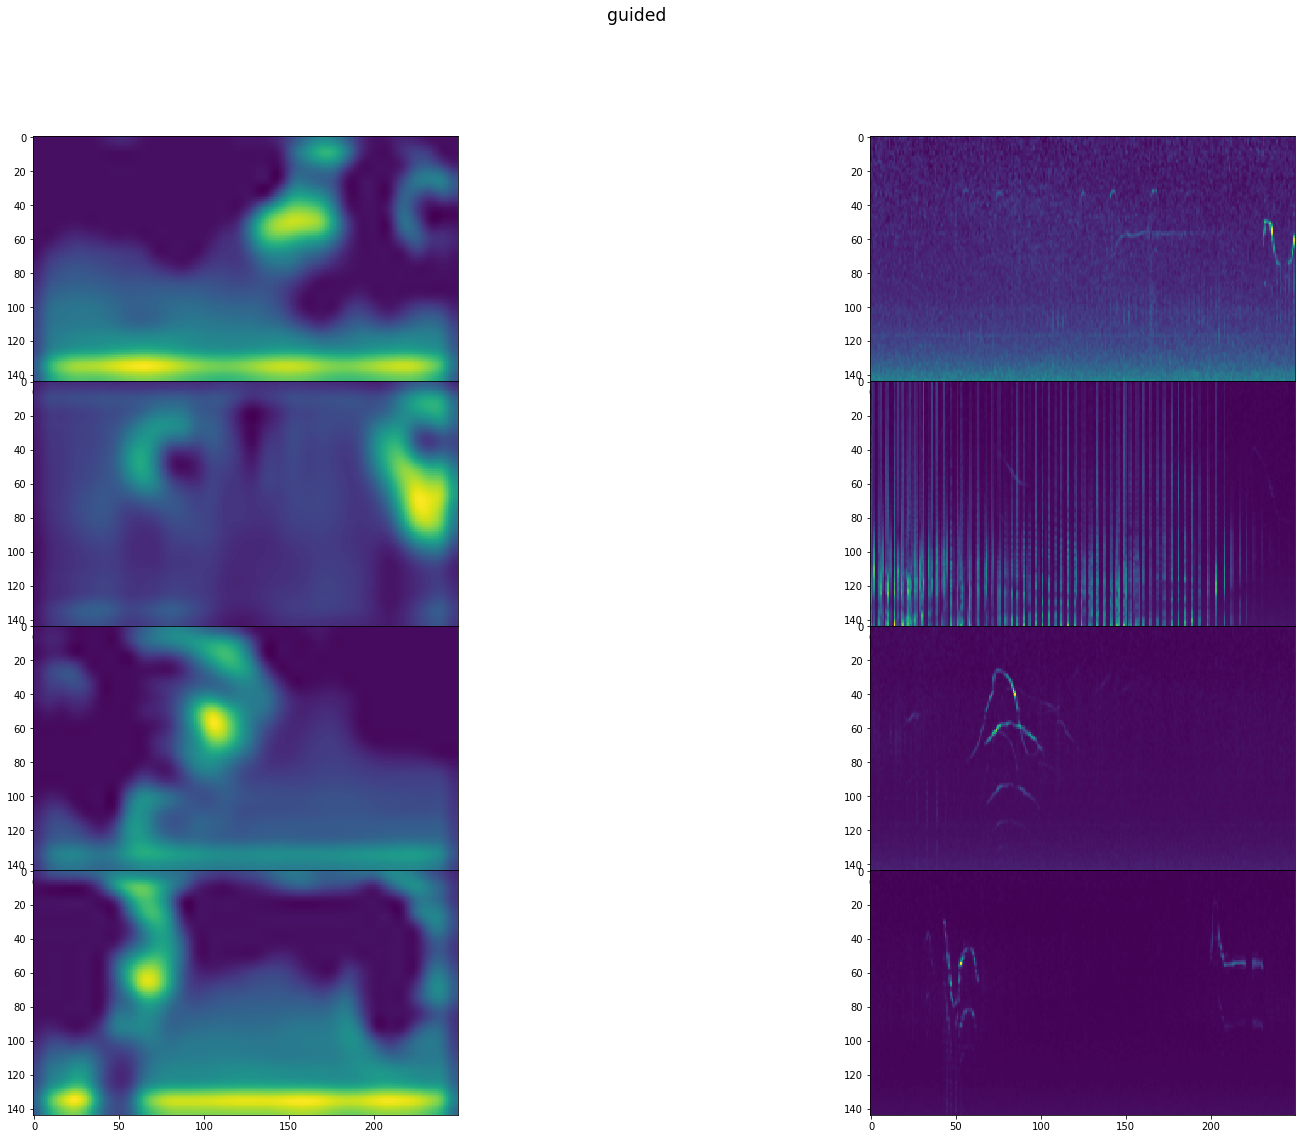

In [13]:
import matplotlib.cm as cm
from vis.visualization import visualize_cam

penultimate_layer = utils.find_layer_idx(model, 'res5c_branch2b')

for modifier in ['deconv', 'guided', 'relu']:
# for modifier in [None]:
# for modifier in ['guided']:
    plt.figure(figsize=(20, 14))
    f, ax = plt.subplots(4, 2)
    plt.suptitle("vanilla" if modifier is None else modifier, fontsize="xx-large")
    for i, img in enumerate([img0, img1, img2, img3]):
        img3d = np.expand_dims(img, axis=0)
        img4d = np.expand_dims(img3d, axis=3)
        grads = visualize_cam(model, -1, filter_indices=1, seed_input=img4d, penultimate_layer_idx=penultimate_layer, 
                              backprop_modifier=modifier)
        # jet_heatmap = np.uint8(cm.jet(grads)[..., :3]*255)
        jet_heatmap = np.squeeze(np.uint8(grads*255))
        # ax[i].imshow(overlay(jet_heatmap, img))
        ax[i, 0].imshow(jet_heatmap)
        ax[i, 1].imshow(img)
    plt.subplots_adjust(wspace=0, hspace=0)

<Figure size 2160x1008 with 0 Axes>

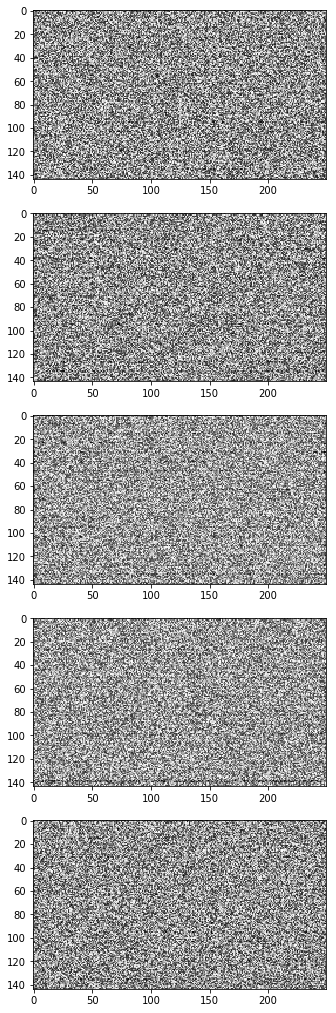

In [11]:
from vis.visualization import visualize_activation
plt.figure(figsize=(30, 14))
f, ax = plt.subplots(5)
for cc in range(5):
    img_act = visualize_activation(model, -1, filter_indices=cc, backprop_modifier='relu')
    ax[cc].imshow(img_act[:,:,0], cmap='gray')
plt.subplots_adjust(wspace=0, hspace=0.2)
        

In [12]:
print("Number of classes:")
print(np.unique(np.array(label_pie1)))
print("Frequency counts for each class")
print(np.bincount(np.array(label_pie1)))


Number of classes:
[0 1 2 3 4]
Frequency counts for each class
[473 481  82 401 767]
